<a href="https://colab.research.google.com/github/jaydigy/jayg_colab_gate/blob/main/ak_nueral_network_by_jgyg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrej Kapathy : Neural Network 강의

In [16]:
pip install micrograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

In [18]:
def f(x):
    return 3*x**2 - 4*x+5

In [19]:
f(3.0)

20.0

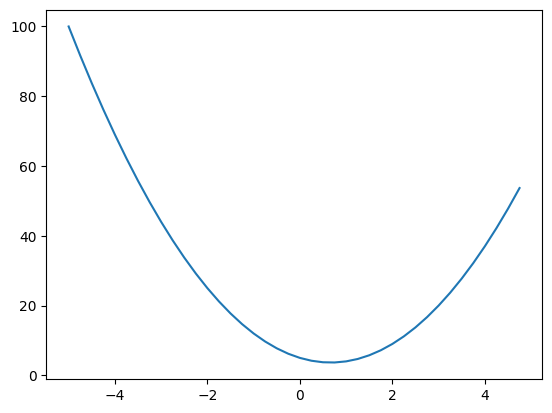

In [20]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
ys
plt.plot(xs, ys)



In [21]:
h = 0.0000001
x = 2/3
(f(x+h)-f(x))/h


2.9753977059954195e-07

In [22]:
# input
a = 2.0
b = -3.0
c = 10.0

d = a*b + c
print(d)



4.0


In [23]:
h =0.0001

#inputs

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)



d1 4.0
d2 4.0001
slope 0.9999999999976694


In [35]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
 
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward    

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)        
        out = Value(self.data * other.data, (self, other), '*')
 
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward    

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other -1)) * out.grad
        out._backward = _backward

        return out


    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return self * other**-1

    def __neg__(self):
        return self*-1

    def __sub__(self, other):
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward  

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        topo

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b ; e.label = 'e'
d = e+c ; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f ; L.label ='L'
L

Value(data=-8.0)

In [25]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [26]:
d._op

'+'

In [27]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065)

In [29]:
a -b

Value(data=5.0)

In [30]:
#brew install graphviz
#pip install graphviz
from graphviz import Digraph

In [31]:
from micrograd.engine import Value

In [32]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    #assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    #dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        #dot.node(name=uid, label = "{ %s | %s }" % (type(n).__name__, n), shape='record') 
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

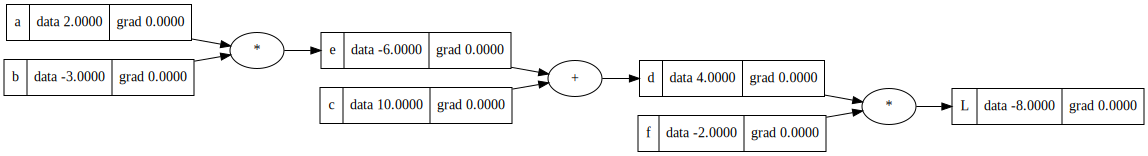

In [33]:
draw_dot(L)

In [36]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d = e+c
L = d*f

print(L.data)

-8.0


L = d * f /
dL/dd =? f /
(f(x+h)-f(x))/h

((d+h)*f-d*f)/h
h*f/h
f

dL/dc
dL/de

dd/dc ? -> 1 
d = c + e
dd/de -> 1
((c+h+e)-(c+e))/h
1

dL/dc
->
dL/dd * dd/dc
-2 * 1
-2

dL/ de =2.0
d:/da = dL/de * de/da


In [37]:
L.grad = 1.0

In [38]:
f.grad = 4.0
d.grad = -2.0

In [39]:
c.grad = -2.0
e.grad = -2.0

In [40]:
a.grad =(-2.0 * -3.0)
b.grad = (-2.0*2.0)

In [41]:
def lol():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = 'e'
    d = e+c ; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f ; L.label ='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = 'e'
    d = e+c ; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f ; L.label ='L'
    L2 = L.data + h

    print((L2-L1)/h)

lol()

0.9999999999976694


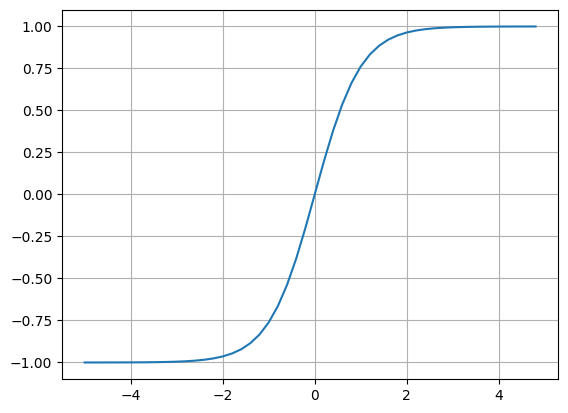

In [42]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid();

In [43]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 +x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh() ; o.label = 'o'


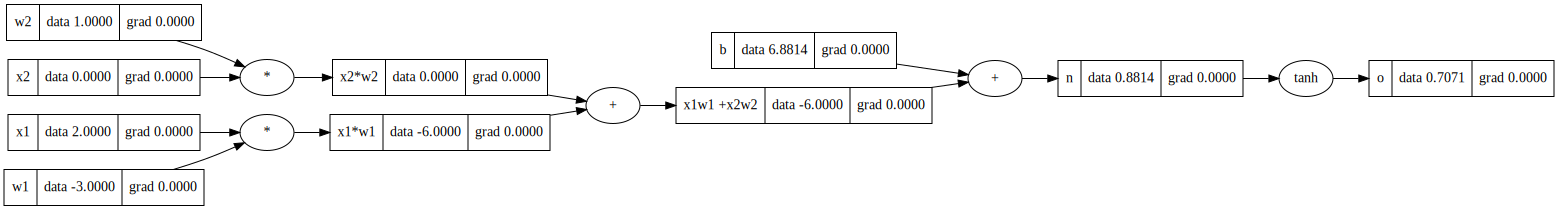

In [44]:
draw_dot(o)

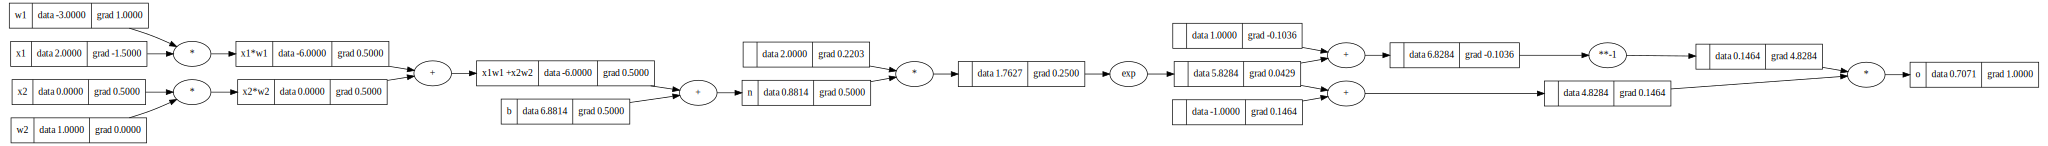

In [45]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 +x2w2'
n = x1w1x2w2 + b; n.label = 'n'
#-----
e = (2 * n).exp()
o = (e - 1)/(e + 1)
#-----
o.label = 'o'
o.backward()
draw_dot(o)

In [ ]:
o.backward()

In [46]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import torch

In [48]:
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [49]:
import random

In [50]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        #print(list(zip(self.w, x)))
        return out

class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x



x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.20434195130372312)

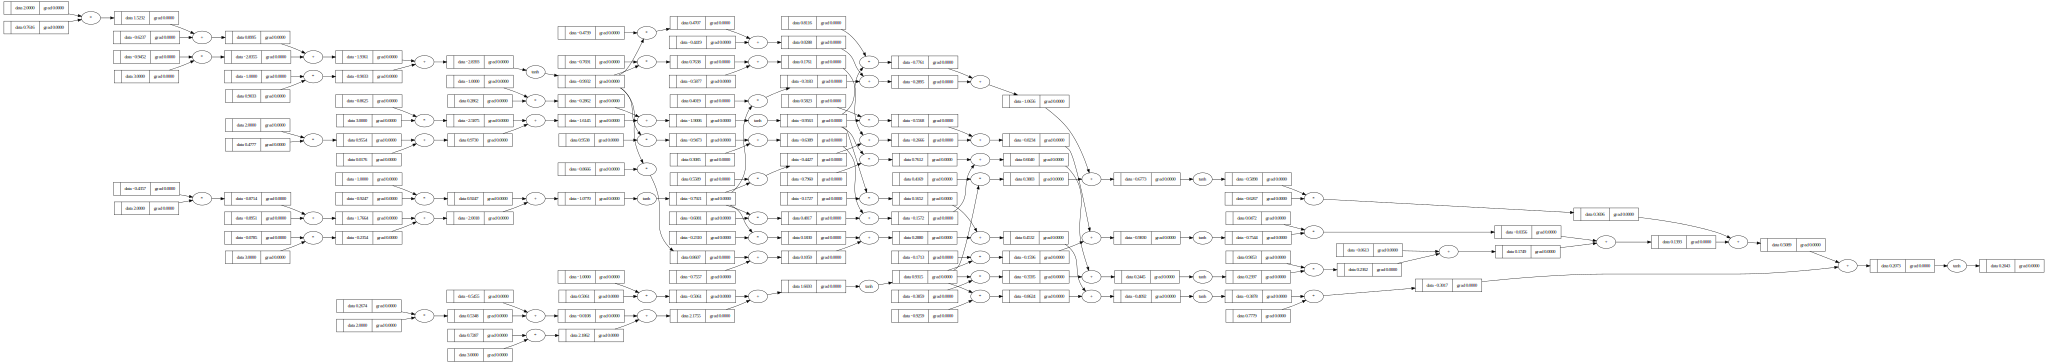

In [51]:
draw_dot(n(x))

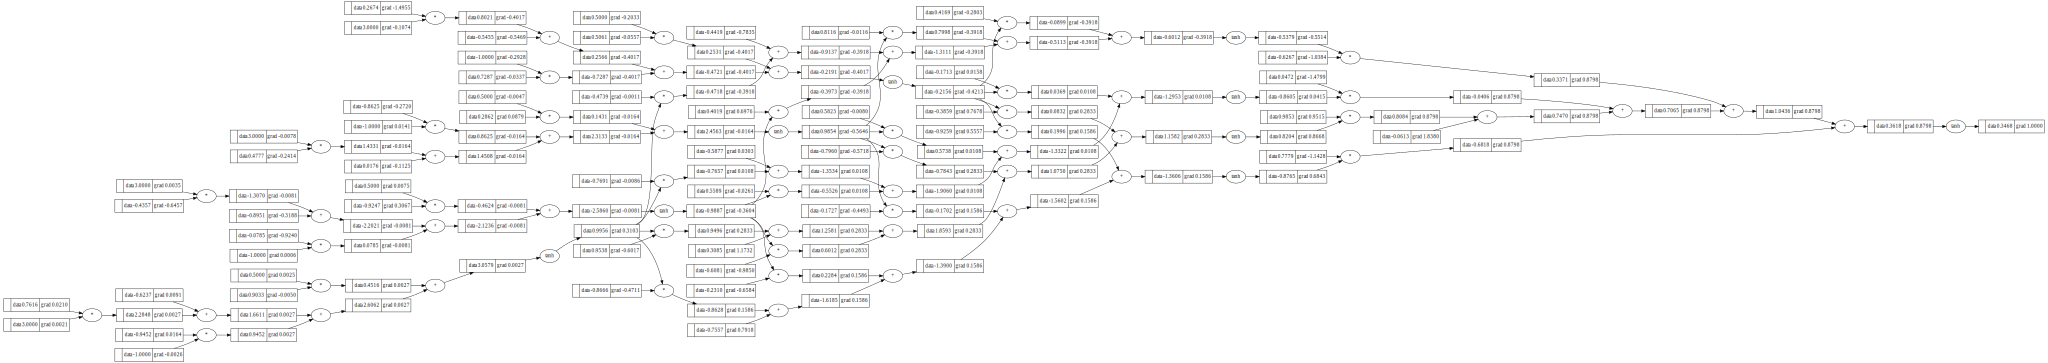

In [63]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] #desired target

ypred = [n(x) for x in xs]
# ys
# ypred_values = [v.data for v in ypred]
# ypred_values
ypred[1]
ypred[1].backward()
draw_dot(ypred[1])

In [80]:
# print((yout, ygt) for ygt, yout in zip(ys, ypred_values))
# loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
# loss = Value(loss)
# loss
# [(yout-ygt)**2 for ygt, yout in zip(ys, ypred)]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
# for ygt, yout in zip(ys, ypred):
#     print(yout)
#     print(ygt, yout.data)
#     print(Value(ygt))
loss = Value(loss)
loss

TypeError: ignored

In [77]:
loss.backward()

In [78]:
n.layers[0].neurons[0].w[0].grad

0.020965385745189705

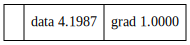

In [79]:
draw_dot(loss)

In [ ]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)


In [ ]:
o.item()



In [ ]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
    node._backward()

In [ ]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

In [ ]:
o.grad = 1.0

In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
b.grad = 0.5
x1w1x2w2.grad = 0.5

In [ ]:
o.grad = 1.0

In [ ]:
n.grad = 0.5

In [ ]:
1-o.data**2

In [ ]:
# o = tanh(x)
# do/dn = 1-tanh(n)**2 = 1 - o**2

In [ ]:
a = Value(3.0, label = 'a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b ; d.label = 'd'
e = a + b ; e.label = 'e'
f = d * e ; f.label = 'f'

f.backward()

draw_dot(f)
